In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 0, 'xx')

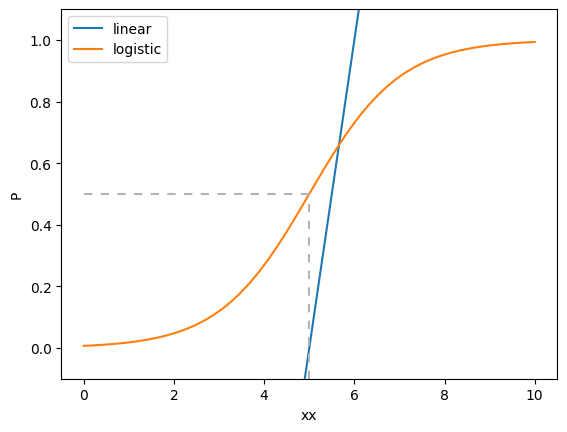

In [3]:
k = 1.
m = -5.
y = lambda x: k*x+m
#p = lambda x: np.exp(k*x+m) / (1+np.exp(k*x+m))
p = lambda x: 1/(1+np.exp(-1*(k*x+m)))

xx = np.linspace(0,10)
plt.plot(xx, y(xx), label='linear')
plt.plot(xx, p(xx), label='logistic')
plt.plot([0, abs(m)], [0.5,0.5], dashes=(4,4), color='.7')
plt.plot([abs(m),abs(m)], [-.1,.5], dashes=(4,4), color='.7')

#limits, legends and labels
plt.ylim((-.1,1.1))
plt.legend(loc=2)
plt.ylabel('P')
plt.xlabel('xx')

Text(0, 0.5, 'No. students')

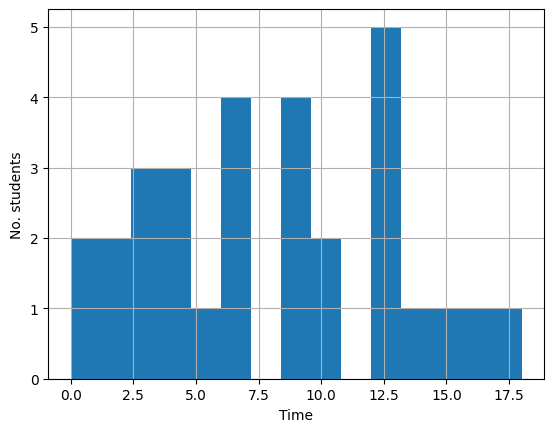

In [4]:
studytime=[0,0,1.5,2,2.5,3,3.5,4,4,4,5.5,6,6.5,7,7,8.5,9,9,9,10.5,10.5,12,12,
12,12.5,13,14,15,16,18]
passed=[0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]
data = pd.DataFrame(data=np.array([studytime, passed]).T, columns=['Time','Pass'])
data.Time.hist(bins=15)
plt.xlabel('Time')
plt.ylabel('No. students')

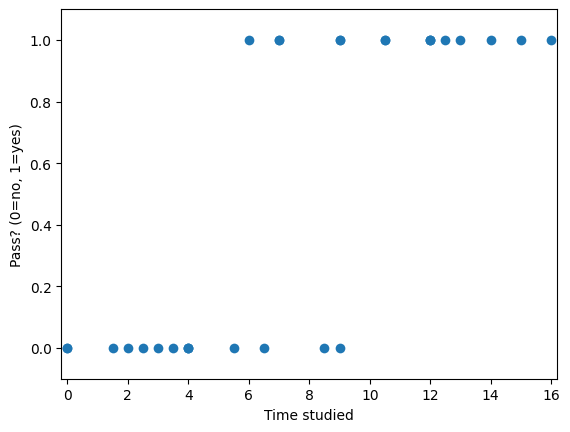

In [5]:
plt.plot(data.Time, data.Pass,'o', mew=0, ms=7,)
plt.ylim(-.1,1.1)
plt.xlim(-0.2,16.2)
plt.xlabel('Time studied')
plt.ylabel('Pass? (0=no, 1=yes)');

In [6]:
import statsmodels.api as sm

In [7]:
probfit = sm.Logit(data.Pass, sm.add_constant(data.Time, prepend=True))

In [8]:
fit_results = probfit.fit()

Optimization terminated successfully.
         Current function value: 0.251107
         Iterations 8


In [9]:
print(fit_results.summary())

                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.6366
Time:                        07:03:40   Log-Likelihood:                -7.5332
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                 2.791e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7980      2.240     -2.588      0.010     -10.188      -1.408
Time           0.8020      0.297      2.703      0.007       0.220       1.384


In [11]:
logit_pars = fit_results.params
intercept_err, slope_err = np.diag(fit_results.cov_params())**.5
fit_results.cov_params()

,const,Time
const,5.017663,-0.635081
Time,-0.635081,0.088035


In [12]:
intercept = logit_pars['const']
slope = logit_pars['Time']
print(intercept, slope)

-5.797986708843619 0.8019792327180768


In [13]:
fit_results.conf_int()

,0,1
const,-10.188333,-1.407640
Time,0.220444,1.383514


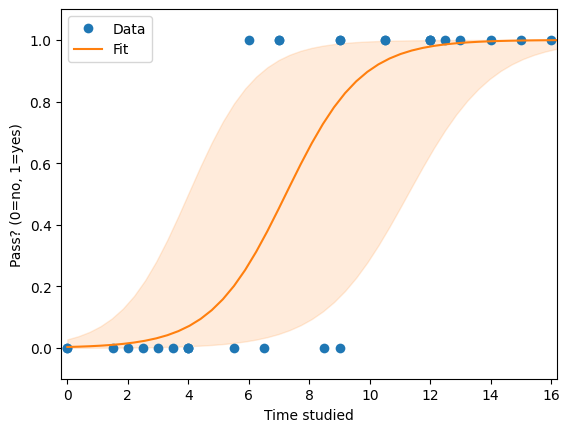

In [19]:
plt.plot(data.Time, data.Pass,'o', mew=0, ms=7, label='Data')
p = lambda x,k,m: 1 / (1+np.exp(-1*(k*x+m)))
xx = np.linspace(0,data.Time.max())
l1 = plt.plot(xx, p(xx,slope,intercept), label='Fit')
plt.fill_between(xx, p(xx,slope+slope_err**2,
intercept+intercept_err), p(xx,slope-slope_err**2, intercept-
intercept_err), alpha=0.15, color=l1[0].get_color())
plt.ylim(-.1,1.1)
plt.xlim(-0.2,16.2)
plt.xlabel('Time studied')
plt.ylabel('Pass? (0=no, 1=yes)')
plt.legend(loc=2, numpoints=1)

In [22]:
target=0.5
x_prob = lambda p,k,m: (np.log(p/(1-p))-m)/k
T_max = x_prob(target, slope-slope_err, intercept-intercept_err)
T_min = x_prob(target, slope+slope_err, intercept+intercept_err)
T_best = x_prob(target, slope, intercept)
print('{0}% sucess rate: {1:.1f} +{2:.1f}/-{3:.1f}'.format(int(target*100),T_best,T_max-T_best,T_best-T_min))


50% sucess rate: 7.2 +8.7/-4.0
